In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import datetime

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#import xgboost as xgb

# Loading preprocessed dataset

In [93]:
electricity_weather_df = pd.read_csv('../data/preprocessed.csv', parse_dates=True)
electricity_weather_df['time'] = electricity_weather_df['time'].apply(datetime.datetime.fromisoformat)

In [94]:
electricity_weather_df['day'] = [x.day for x in electricity_weather_df['time']]
electricity_weather_df['month'] = [x.month for x in electricity_weather_df['time']]
electricity_weather_df['year'] = [x.year for x in electricity_weather_df['time']]
electricity_weather_df['hour'] = [x.hour for x in electricity_weather_df['time']]

## Training 

Choosing training features

In [95]:
features = ['hour','month','glob_irrad_in_diffuse','temp']

In [96]:
electricity_weather_df = electricity_weather_df.set_index('time')
electricity_weather_df = electricity_weather_df[features+['energy']]

In [97]:
electricity_weather_df.dropna()

,hour,month,glob_irrad_in_diffuse,temp,energy
time,,,,,
2022-04-24 13:00:00,13,4,285.451531,17.333333,1027.0
2022-04-24 14:00:00,14,4,231.998159,18.493750,1015.0
2022-04-24 15:00:00,15,4,119.028416,17.000000,1031.0
2022-04-24 16:00:00,16,4,101.904795,16.950000,1019.0
2022-04-24 17:00:00,17,4,54.970074,16.033333,1003.0
...,...,...,...,...,...
2022-10-24 07:00:00,7,10,79.074353,12.145455,1491.0
2022-10-24 08:00:00,8,10,150.080133,14.475000,1706.0
2022-10-24 09:00:00,9,10,192.674457,15.728571,1886.0


In [98]:
electricity_weather_df = electricity_weather_df.dropna()

In [99]:
X = electricity_weather_df[features]
Y = electricity_weather_df['energy']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Decision Tree Regressor Model

In [100]:
DecTreeReg= DecisionTreeRegressor()
DecTreeReg.fit(X_train, y_train)

DecisionTreeRegressor()

In [101]:
DTRPred=DecTreeReg.predict(X_test)

Evaluation

R^2 = -0.16


<Figure size 640x480 with 0 Axes>

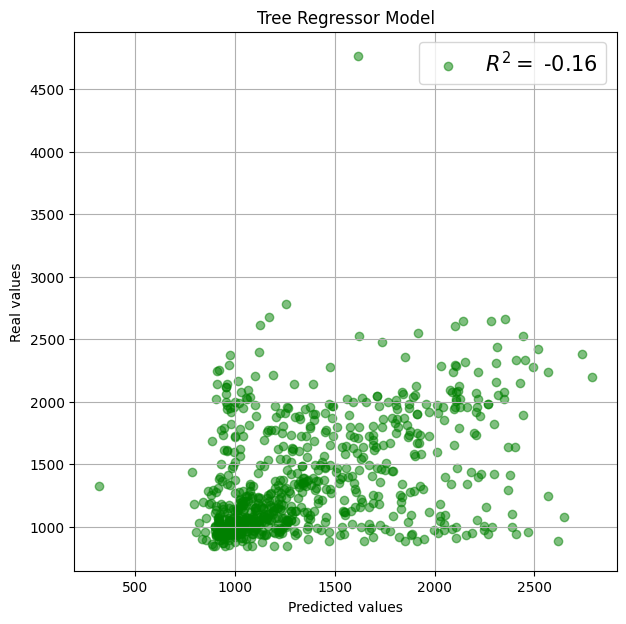

,hour,month,glob_irrad_in_diffuse,temp,energy_pred,energy_real
time,,,,,,
2022-07-01 19:00:00,19,7,7.535884,21.216667,1518.0,1282.0
2022-05-28 06:00:00,6,5,49.274761,14.128571,967.0,935.0
2022-05-16 18:00:00,18,5,18.745288,19.950000,1123.0,1279.0
2022-06-29 23:00:00,23,6,6.961515,21.525000,1127.0,1099.0
2022-07-23 16:00:00,16,7,111.251443,33.175000,2138.0,1391.0
...,...,...,...,...,...,...
2022-08-31 04:00:00,4,8,7.028439,18.333333,903.0,947.0
2022-06-01 07:00:00,7,6,84.044792,21.500000,1567.0,1446.0
2022-07-02 09:00:00,9,7,83.593488,25.500000,1135.0,1106.0


In [102]:

mse = (np.sqrt(mean_squared_error(y_test, DTRPred)))
r2= r2_score(y_test, DTRPred)
mae = mean_absolute_error(y_test, DTRPred)
print("R^2 = {:.2f}".format(r2))
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test,DTRPred,alpha=0.5
        ,color='green',label=r'$R^2 = $ {:.2f}'.format(r2))
plt.title("Tree Regressor Model")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
plt.show()
X_train.describe().T
test_df = X_test.copy()

test_df['energy_pred'] = DTRPred
test_df['energy_real'] = y_test
test_df

In [103]:
test_df['energy_pred'] = DTRPred
test_df['energy_real'] = y_test
test_df[:20]

,hour,month,glob_irrad_in_diffuse,temp,energy_pred,energy_real
time,,,,,,
2022-07-01 19:00:00,19,7,7.535884,21.216667,1518.0,1282.0
2022-05-28 06:00:00,6,5,49.274761,14.128571,967.0,935.0
2022-05-16 18:00:00,18,5,18.745288,19.950000,1123.0,1279.0
2022-06-29 23:00:00,23,6,6.961515,21.525000,1127.0,1099.0
2022-07-23 16:00:00,16,7,111.251443,33.175000,2138.0,1391.0
2022-05-31 17:00:00,17,5,42.333838,22.283333,1043.0,1267.0
2022-04-29 21:00:00,21,4,6.742094,11.460000,1003.0,967.0
2022-05-17 09:00:00,9,5,394.646054,23.828571,2074.0,2090.0
2022-10-07 12:00:00,12,10,143.071382,23.260000,1794.0,1579.0


In [104]:
test_df['time'] = test_df.index.to_series()

converting actual & predicted data to non-comulative

In [105]:
# test_df['energy_real_lag'] = test_df['energy_real'].shift(1).fillna(0)
# test_df['energy_real_difference'] = test_df['energy_real'] - test_df['energy_real_lag'] 

# test_df['energy_pred_lag'] = test_df['energy_pred'].shift(1).fillna(0)
# test_df['energy_pred_difference'] = test_df['energy_pred'] - test_df['energy_pred_lag'] 
# #removing first row since it is not possible to have non-comulative data for this row
# test_df = test_df[1:]

# #removing first row since it is not possible to have non-comulative data for this row
# test_df = test_df[1:]

## Plotting different days of predicted vs actual data

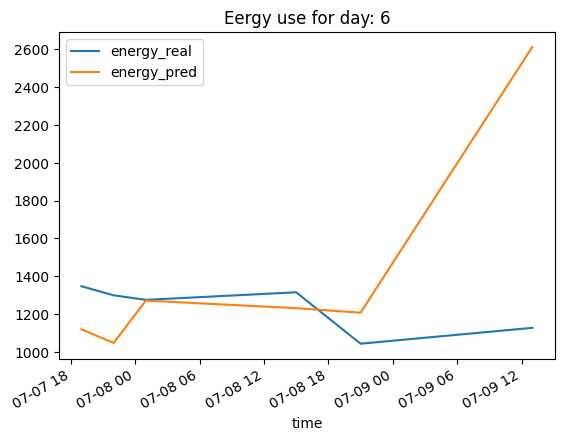

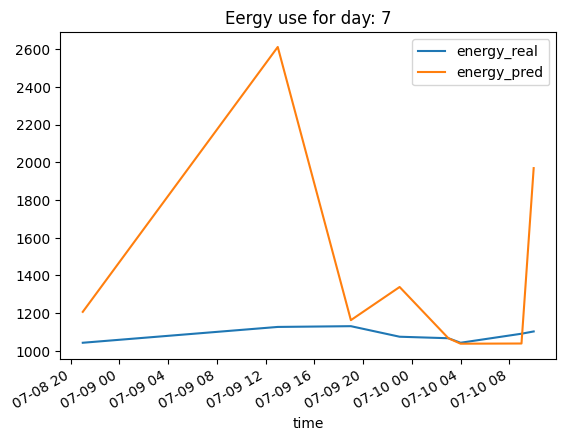

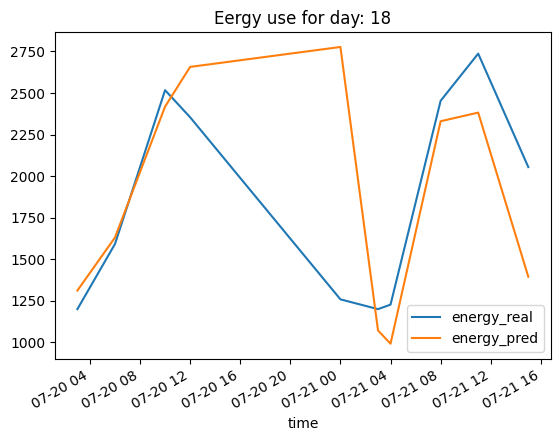

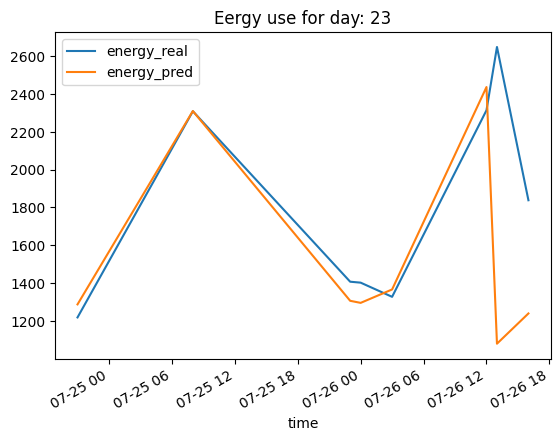

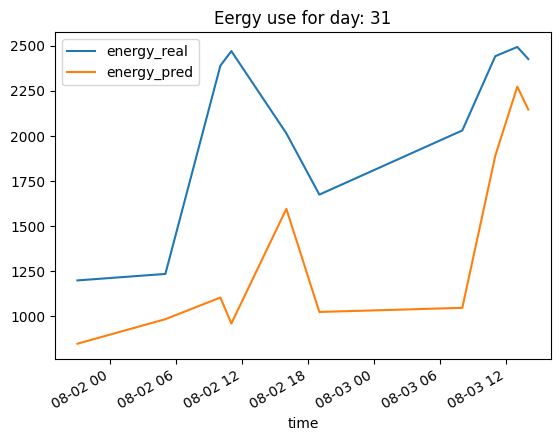

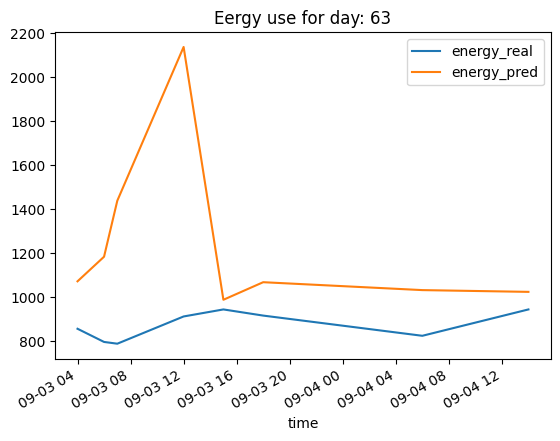

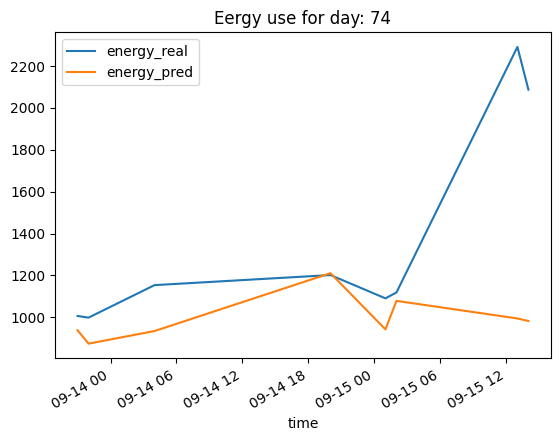

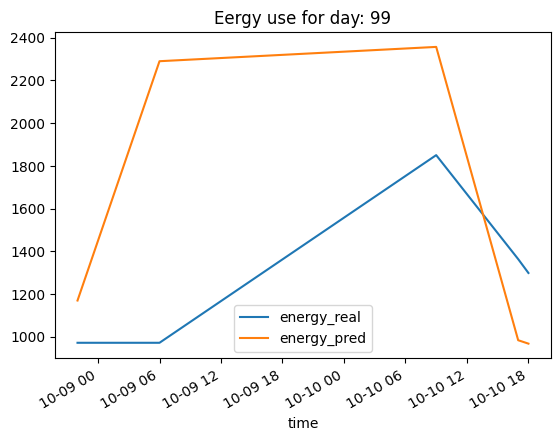

In [106]:
for day_number in [6, 7, 18,23, 31, 63, 74, 99,]:
    day_df = test_df[(test_df['time'] >= (test_df.index.to_series()  .iloc[0] + datetime.timedelta(days=day_number))) &  (test_df['time'] < (test_df['time'].iloc[0] + datetime.timedelta(days=day_number+2)))]
    fig = day_df.plot(x='time',y=['energy_real','energy_pred'])
    plt.title("Eergy use for day: "+ str(day_number))
    plt.savefig('../plots/decision_tree_regressor/pred_real_day_number_'+str(day_number)+'.png')

### Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
log_reg = LogisticRegression(random_state = 10)  
log_reg.fit(X_train, y_train)

/home/ben/Documents/Dilt/InffeldEnergy/inffeldEnergy/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [109]:
logPred=log_reg.predict(X_test)

Evaluation

R^2 = -0.53


<Figure size 640x480 with 0 Axes>

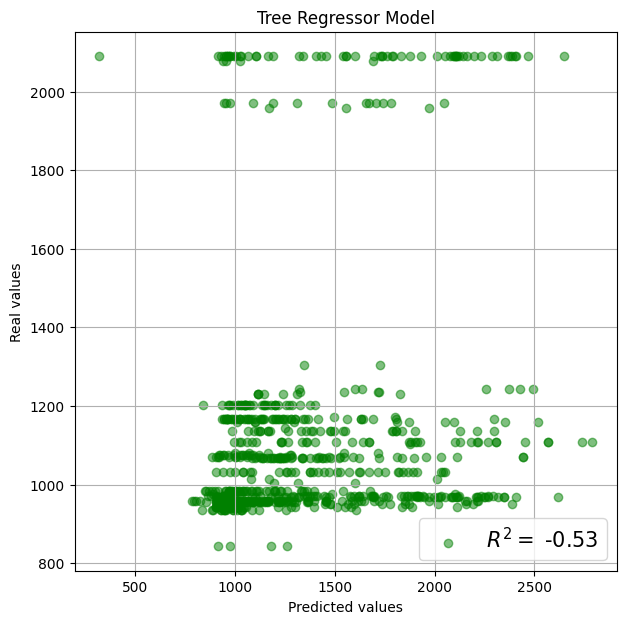

,hour,month,glob_irrad_in_diffuse,temp,energy_pred,energy_real
time,,,,,,
2022-07-01 19:00:00,19,7,7.535884,21.216667,1067.0,1282.0
2022-05-28 06:00:00,6,5,49.274761,14.128571,959.0,935.0
2022-05-16 18:00:00,18,5,18.745288,19.950000,1167.0,1279.0
2022-06-29 23:00:00,23,6,6.961515,21.525000,1167.0,1099.0
2022-07-23 16:00:00,16,7,111.251443,33.175000,1135.0,1391.0
...,...,...,...,...,...,...
2022-08-31 04:00:00,4,8,7.028439,18.333333,1075.0,947.0
2022-06-01 07:00:00,7,6,84.044792,21.500000,1031.0,1446.0
2022-07-02 09:00:00,9,7,83.593488,25.500000,1071.0,1106.0


In [110]:

mse = (np.sqrt(mean_squared_error(y_test, logPred)))
r2= r2_score(y_test, logPred)
mae = mean_absolute_error(y_test, logPred)
print("R^2 = {:.2f}".format(r2))
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test,logPred,alpha=0.5
        ,color='green',label=r'$R^2 = $ {:.2f}'.format(r2))
plt.title("Tree Regressor Model")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
plt.show()
X_train.describe().T
test_df = X_test.copy()

test_df['energy_pred'] = logPred
test_df['energy_real'] = y_test
test_df

In [111]:
test_df['energy_pred'] = logPred
test_df['energy_real'] = y_test
test_df[:20]

,hour,month,glob_irrad_in_diffuse,temp,energy_pred,energy_real
time,,,,,,
2022-07-01 19:00:00,19,7,7.535884,21.216667,1067.0,1282.0
2022-05-28 06:00:00,6,5,49.274761,14.128571,959.0,935.0
2022-05-16 18:00:00,18,5,18.745288,19.950000,1167.0,1279.0
2022-06-29 23:00:00,23,6,6.961515,21.525000,1167.0,1099.0
2022-07-23 16:00:00,16,7,111.251443,33.175000,1135.0,1391.0
2022-05-31 17:00:00,17,5,42.333838,22.283333,1135.0,1267.0
2022-04-29 21:00:00,21,4,6.742094,11.460000,1167.0,967.0
2022-05-17 09:00:00,9,5,394.646054,23.828571,2090.0,2090.0
2022-10-07 12:00:00,12,10,143.071382,23.260000,967.0,1579.0


In [112]:
test_df['time'] = test_df.index.to_series()

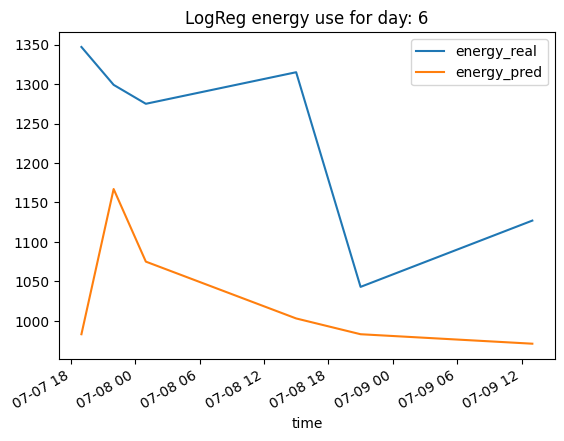

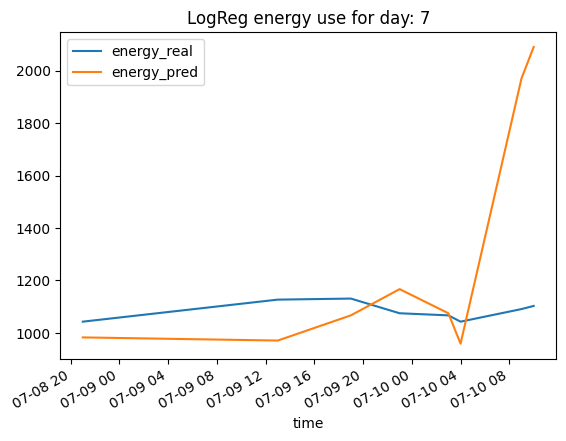

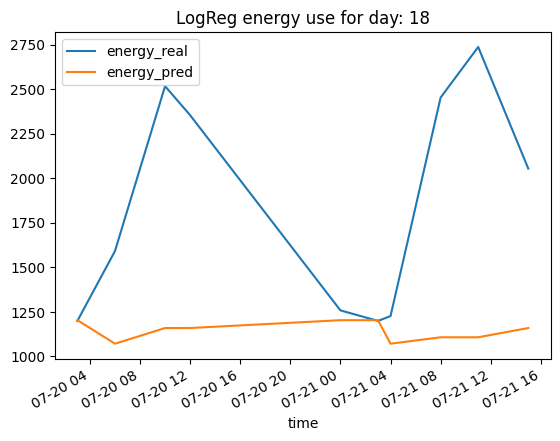

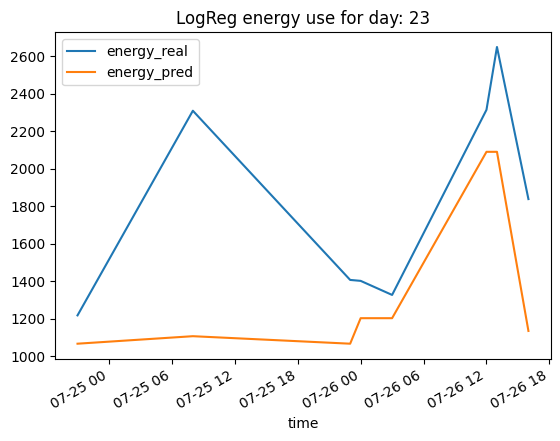

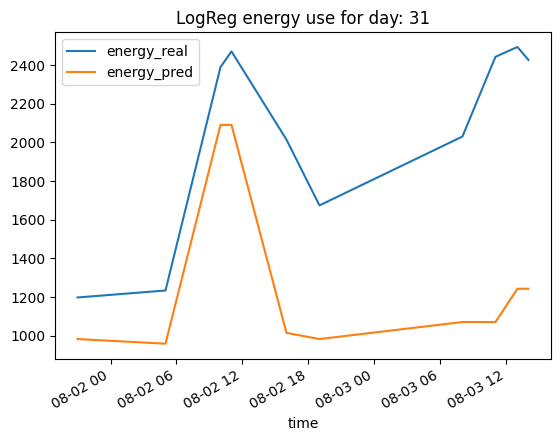

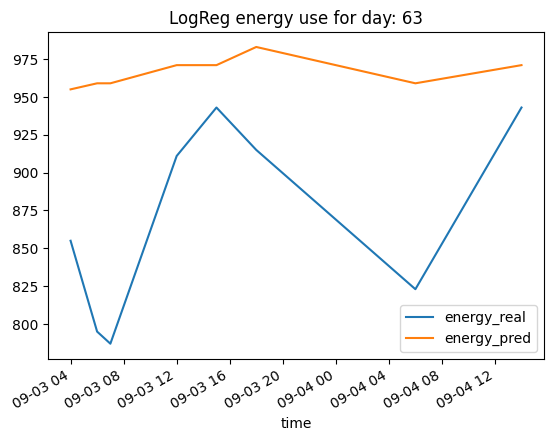

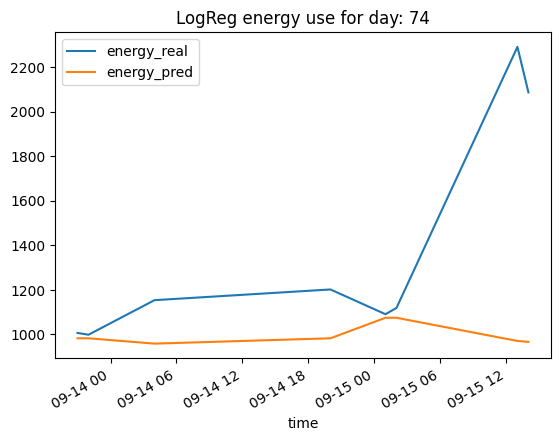

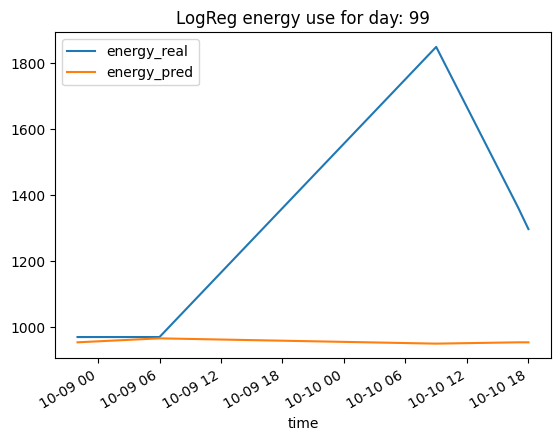

In [113]:
for day_number in [6, 7, 18,23, 31, 63, 74, 99,]:
    day_df = test_df[(test_df['time'] >= (test_df['time'].iloc[0] + datetime.timedelta(days=day_number))) &  (test_df['time'] < (test_df['time'].iloc[0] + datetime.timedelta(days=day_number+2)))]
    fig = day_df.plot(x='time',y=['energy_real','energy_pred'])
    plt.title("LogReg energy use for day: "+ str(day_number))
    plt.savefig('../plots/logistic_regression/pred_real_day_number_'+str(day_number)+'.png')

### Bayesian Ridge

In [114]:
from  sklearn.linear_model import BayesianRidge

In [115]:
br  =  BayesianRidge()    
br.fit(X_train, y_train)

BayesianRidge()

In [116]:
brPred  =  br.predict(X_test)

R^2 = 0.26


<Figure size 640x480 with 0 Axes>

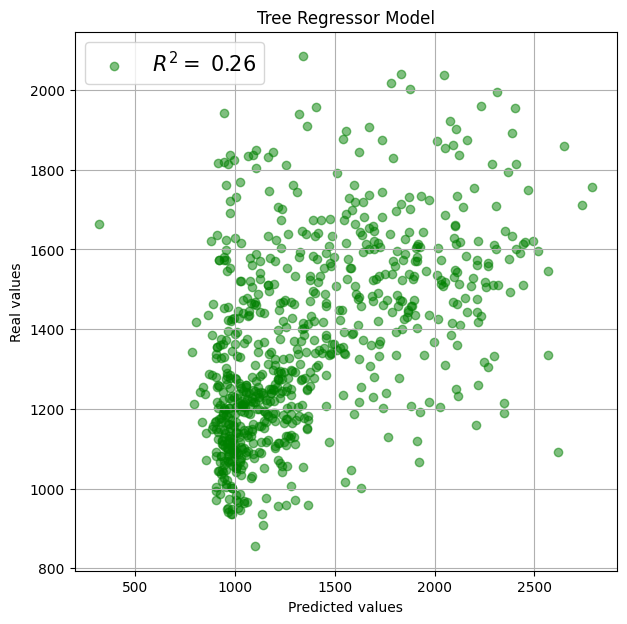

,hour,month,glob_irrad_in_diffuse,temp,energy_pred,energy_real
time,,,,,,
2022-07-01 19:00:00,19,7,7.535884,21.216667,1067.0,1234.994326
2022-05-28 06:00:00,6,5,49.274761,14.128571,959.0,1112.257592
2022-05-16 18:00:00,18,5,18.745288,19.950000,1167.0,1186.633486
2022-06-29 23:00:00,23,6,6.961515,21.525000,1167.0,1218.077252
2022-07-23 16:00:00,16,7,111.251443,33.175000,1135.0,1673.425425
...,...,...,...,...,...,...
2022-08-31 04:00:00,4,8,7.028439,18.333333,1075.0,1203.077988
2022-06-01 07:00:00,7,6,84.044792,21.500000,1031.0,1353.381479
2022-07-02 09:00:00,9,7,83.593488,25.500000,1071.0,1461.574294


In [117]:
mse = (np.sqrt(mean_squared_error(y_test, brPred)))
r2= r2_score(y_test, brPred)
mae = mean_absolute_error(y_test, brPred)
print("R^2 = {:.2f}".format(r2))
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test,brPred,alpha=0.5
        ,color='green',label=r'$R^2 = $ {:.2f}'.format(r2))
plt.title("Tree Regressor Model")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
plt.show()
X_train.describe().T
test_df = X_test.copy()

test_df['energy_pred'] = logPred
test_df['energy_real'] = brPred
test_df

In [118]:
test_df['energy_pred'] = brPred
test_df['energy_real'] = y_test
test_df[:20]

test_df['time'] = test_df.index.to_series()

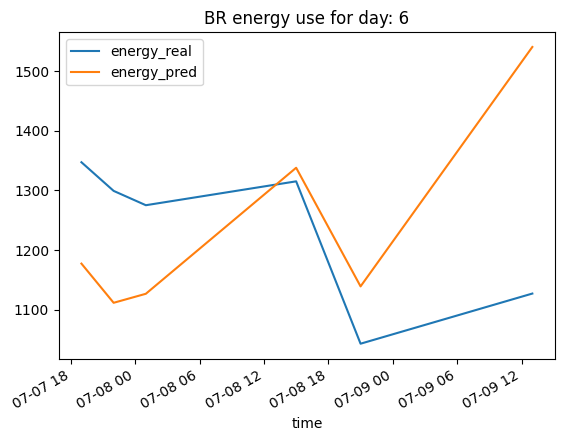

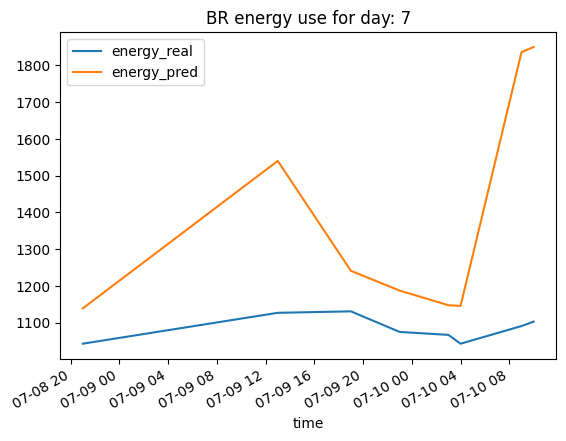

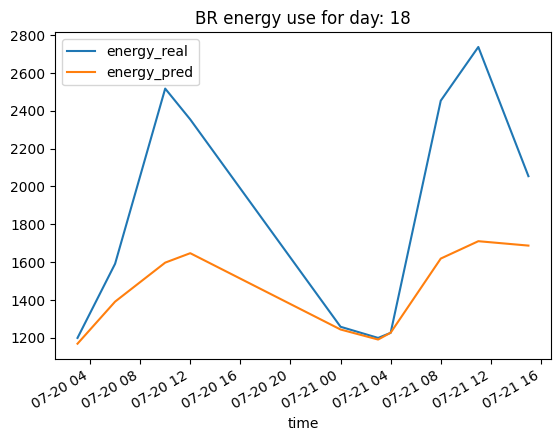

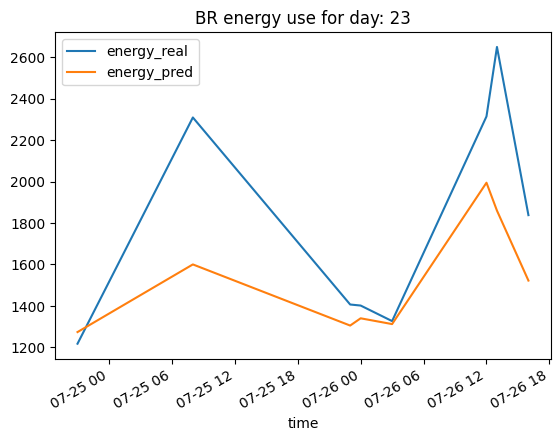

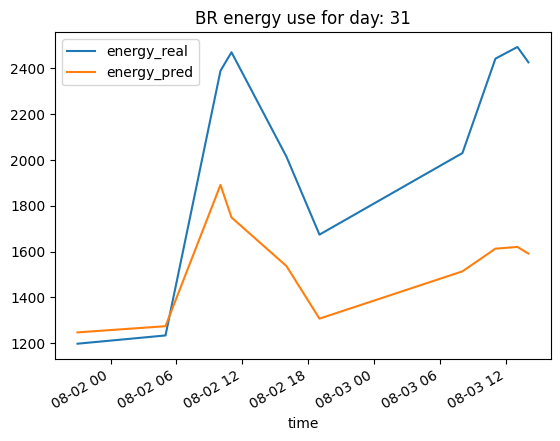

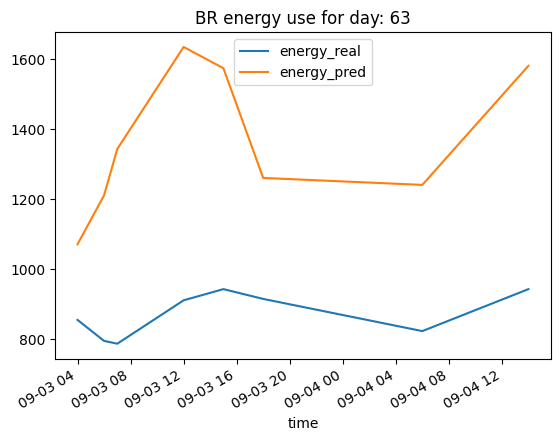

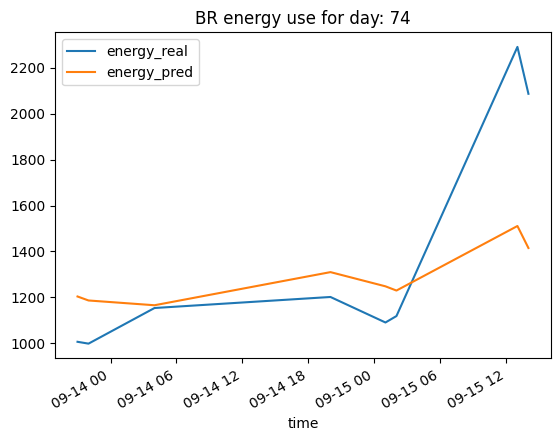

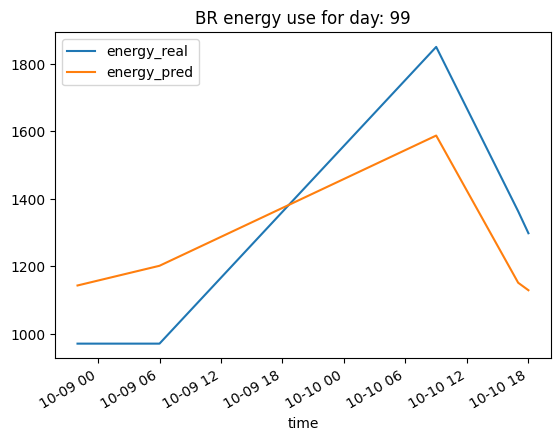

In [119]:
for day_number in [6, 7, 18,23, 31, 63, 74, 99,]:
    day_df = test_df[(test_df['time'] >= (test_df['time'].iloc[0] + datetime.timedelta(days=day_number))) &  (test_df['time'] < (test_df['time'].iloc[0] + datetime.timedelta(days=day_number+2)))]
    fig = day_df.plot(x='time',y=['energy_real','energy_pred'])
    plt.title("BR energy use for day: "+ str(day_number))
    plt.savefig('../plots/baysian_ridge/pred_real_day_number_'+str(day_number)+'.png')